In [54]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid", palette="husl")


In [55]:
#Loading Data
df= pd.read_csv('sales.csv')

## Understanding Data

In [56]:
# preview of the first 10 Rows
df.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,1,Call,17ca2073-db8a-4b9f-83e6-278e5d21c37b,9,42.70,24,28,Pennsylvania
1,1,Call,c296c787-c70e-40b1-9bf2-151248b71986,8,40.05,4,17,Alabama
2,1,Email + Call,375a57db-00c9-4fea-aba0-557fbf99af24,9,NaN,5,21,Texas
3,1,Email,5b372650-a860-46c9-bab4-4835da5b08f5,9,86.80,9,20,Pennsylvania
4,1,Email + Call,53d4d2ef-d9c1-45d7-9f13-dc49e1ae8b07,13,190.37,0,32,Alabama
5,1,Email,fdd40530-41ad-4c8a-8688-e5bfc57bb846,11,107.67,6,26,New Jersey
6,1,Email,1862ccaf-fe2d-444c-8a03-bb47bcbf4056,10,99.28,1,19,Wyoming
7,1,Email,3487f16d-00f3-4058-bfdd-6fd6fcb31648,11,108.92,1,28,Iowa
8,1,Email + Call,43e409a8-419d-4c58-bce0-821107372060,9,132.68,15,26,Kentucky
9,1,Email,1bdf7e51-1308-4447-827d-811569748c2a,11,105.44,6,27,Connecticut


In [57]:
#Shape of the Dataset
print(f"The Dimension of our Dataset is {df.shape}")

The Dimension of our Dataset is (15000, 8)


In [58]:
#Columns in the Dataset
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [59]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


The Data has 1500 entries, each row representing a customer and 8 columns represennting the features or attributes describing each customer.
The following are the features:-
- `week` → Week sale was made,counted as weeks since product launch
- `sales_method` → Character, which of the three sales methods were used for that customer
- `customer_id` → Character, unique identifier for the customer
- `nb_sold` → Numeric, number of new products sold
- `revenue` → Numeric, revenue from the sales, rounded to 2 decimal places.
- `years_as_customer` → Numeric, number of years customer has been buying from us
(company founded in 1984)
- `nb_site_visits` → Numeric, number of times the customer has visited our website in the last 6 months
- `state` → Character, location of the customer i.e. where orders are
 shipped



## Data Cleaning

In [60]:
#Checking for duplicates
print(f"Number of duplicates in the Dataset: {df.duplicated().sum()}")

Number of duplicates in the Dataset: 0


In [61]:
#Checking for missing values
print(f"Number of missing values per column: ")
df.isna().sum()

Number of missing values per column: 


week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

**Handling missing values**

To handle the missing values in the `revenue` column we will replace the missing values  with `0` to indicate that the sales made by that customer did not generate any revenue

In [62]:
# Replacing missing values
df['revenue'] = df['revenue'].fillna(0.00)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

**Inspecting Data types**

Ensuring that categorical variables have the `Category` data type and converting relevant data types where necessary.

In [63]:
# Inspecting Data Types
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [64]:
df[['week', 'sales_method', 'state']] =df[['week', 'sales_method', 'state']].astype('category')

# Ensuring revenue is rounded to two decimal places
# df['revenue'] = round(df['revenue'], 2)
df.dtypes

week                 category
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object

In [65]:
#Ensuring the customer_id column contains only unique values
df['customer_id'].nunique()

15000

In [66]:
#Looking for anomalies in the sales_method column to ensure we have unique categories:- 'Call', 'Email', 'Email + call'
categories = {'em + call':'Email + Call'}
df['sales_method']= df['sales_method'].replace(categories).str.title()
df['sales_method'].unique()



array(['Call', 'Email + Call', 'Email'], dtype=object)

In [67]:
#Lets do the same for the state column
df['state']= df['state'].str.title()
df['state'].unique()

array(['Pennsylvania', 'Alabama', 'Texas', 'New Jersey', 'Wyoming',
       'Iowa', 'Kentucky', 'Connecticut', 'Arizona', 'California',
       'Virginia', 'New York', 'Arkansas', 'Ohio', 'Michigan',
       'Minnesota', 'Florida', 'Illinois', 'Missouri', 'Kansas',
       'Georgia', 'Indiana', 'Oklahoma', 'Louisiana', 'West Virginia',
       'Colorado', 'Wisconsin', 'South Carolina', 'North Carolina',
       'Nevada', 'Nebraska', 'New Mexico', 'Washington', 'Oregon',
       'North Dakota', 'Tennessee', 'Mississippi', 'Massachusetts',
       'Maryland', 'New Hampshire', 'South Dakota', 'Utah', 'Maine',
       'Hawaii', 'Rhode Island', 'Alaska', 'Vermont', 'Delaware', 'Idaho',
       'Montana'], dtype=object)

In [68]:
#saving the cleaned data
# df.to_csv('Cleaned_Sales.csv')

## Demographics

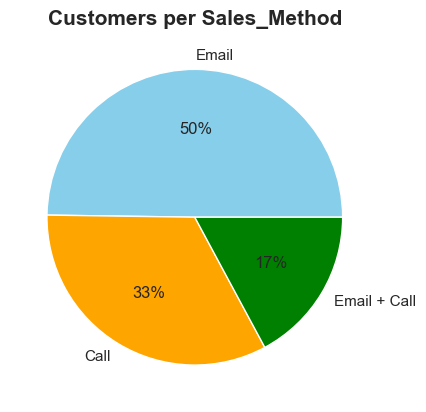

In [91]:
# How many customers were there for each approach?
sizes = df['sales_method'].value_counts(normalize= True)
labels = sizes.index
plt.pie(sizes, labels= labels, autopct= '%1.0f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Customers per Sales_Method', fontweight = 'bold', fontsize = 15)
plt.show()

 **Observation**
 
The `Email` sales method is the most common, accounting for __50%__ of total customers. The `Call` method follows with **33%**, indicating it is also a significant approach but less than Email.The `Email + Call` combination is the least used, making up only __17%__ of the total customers. 

This suggests that Email is the dominant sales method, while the combination of Email + Call is the least preferred or least effective among customers. 

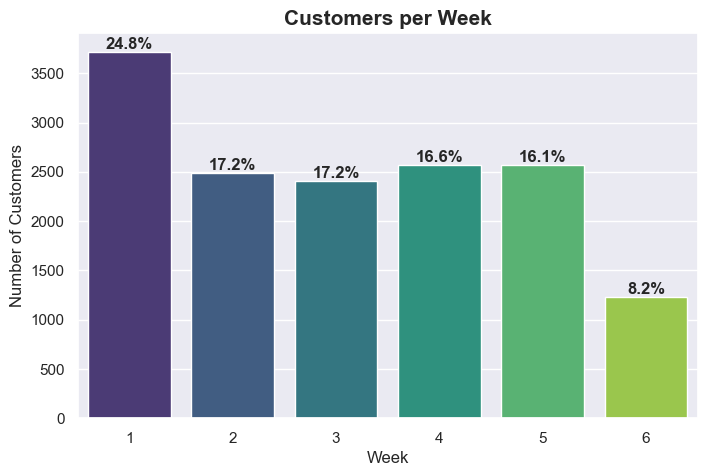

In [ ]:
#Which week had the most customers?
week_counts = df['week'].value_counts()  
percentages = (week_counts / week_counts.sum()) * 100 

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='week', data=df, palette="viridis")
# Add percentage labels
for a, week in zip(ax.patches, week_counts.index): 
    ax.text(a.get_x() + a.get_width()/2, a.get_height(),  
            f'{percentages[week]:.1f}%',  
            ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title('Customers per Week', fontweight='bold', fontsize=15)
plt.xlabel("Week")
plt.ylabel("Number of Customers")
plt.show()


**Observation**

The bar chart displays the percentage distribution of customers across different weeks. Week 1 had the highest number of customers, accounting for 24.8% of the total, significantly leading compared to other weeks. Weeks 2 and 3 had equal customer proportions at 17.2% each, indicating a steady flow of customers. Week 4 followed closely with 16.6%, while Week 5 had a slightly lower share at 16.1%. Week 6 had the least number of customers at just 8.2%, showing a notable decline. 

Overall, the chart suggests that customer activity peaked at the beginning and gradually declined towards Week 6.

Text(0, 0.5, 'State')

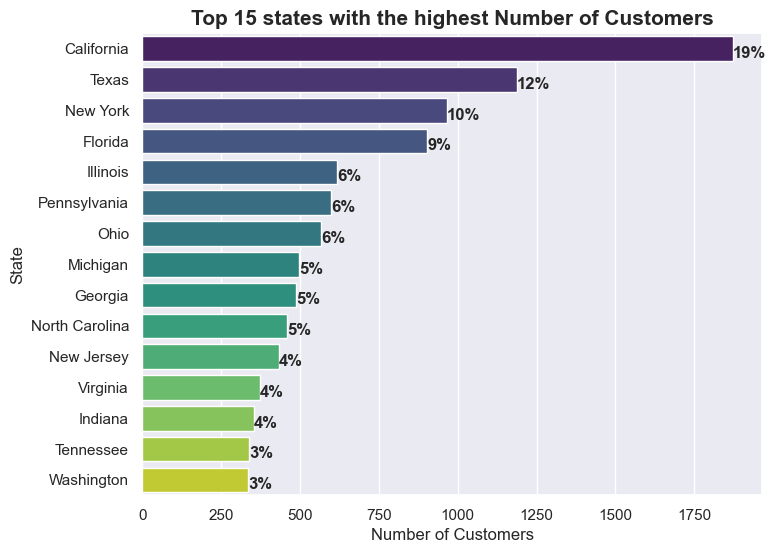

In [71]:
# From which state were most customers from?
count = df['state'].value_counts().sort_values(ascending= False).head(15)
state_count = (count/ count.sum())*100
plt.figure(figsize =(8,6))
ax= sns.countplot(y= 'state', data= df, order = count.index, palette= 'viridis')
for a, state in zip(ax.patches, count.index):
    ax.text(a.get_width(), a.get_y() + a.get_height(), f'{state_count[state]:.0f}%', ha= 'left', va= 'bottom', 
            fontweight= 'bold', fontsize= 12)

plt.title('Top 15 states with the highest Number of Customers', fontweight = 'bold', fontsize =15)
plt.xlabel('Number of Customers')
plt.ylabel('State')


#check how to display top 10 states, and order

**Observation**

The chart shows that California has the highest number of customers at 19%, significantly leading other states. Texas, New York, and Florida also have a considerable share of customers, while the remaining states have a more evenly distributed but smaller customer base. The trend suggests that customer concentration is higher in a few key states, with a gradual decline across the rest. 

The distribution suggests that the majority of customers are concentrated in a few key states, with California having a notable dominance over the rest. The presence of several states with smaller percentages indicates a wider but less concentrated customer base across the country.

## Univariate analysis

**Distribution of Revenue**

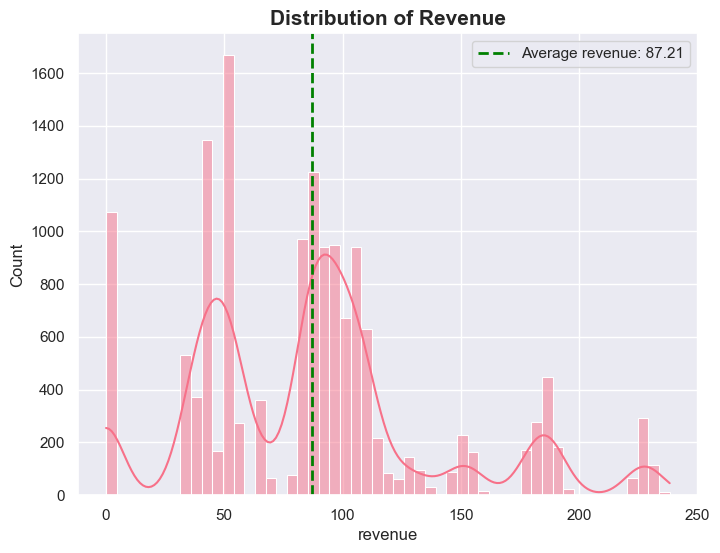

In [93]:
#Let's look at the distribution of revenue
plt.figure(figsize=(8,6))
sns.histplot(x='revenue', data= df, kde= True)
plt.title('Distribution of Revenue', fontsize= 15, fontweight= 'bold')
mean_revenue = df['revenue'].mean()
plt.axvline(mean_revenue, color='green', linestyle='dashed', linewidth=2, label=f'Average revenue: {mean_revenue:.2f}')
plt.legend()
plt.show()

**Observation**

The histogram displays the distribution of revenue, showing how frequently different revenue values occur. The data appears to be multimodal with a mean of 87.21, meaning it has multiple peaks, indicating that revenue tends to cluster around certain values rather than being evenly spread. There are notable spikes around 50, 100, and 200, suggesting that certain revenue values are more common. The Kernel Density Estimate (KDE) line further highlights these peaks and the overall shape of the distribution. The spread of revenue is wide, ranging from close to 0 up to around 250, with some noticeable gaps where fewer transactions occur. 

This pattern may suggest different pricing structures, customer segments, or sales strategies affecting revenue distribution.

## Bivariate Analysis

**Products Sold per Sales Method**

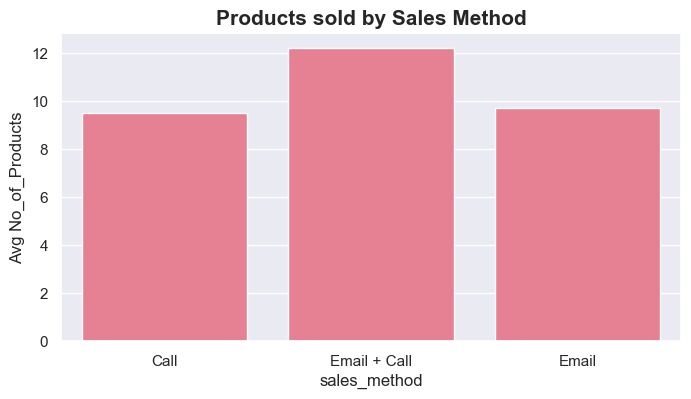

In [95]:
plt.figure(figsize=(8,4))
sns.barplot(x='sales_method', y='nb_sold', data= df, errorbar= None)
plt.title('Products sold by Sales Method', fontweight= 'bold', fontsize= 15)
plt.ylabel('Avg No_of_Products')
plt.show()

**Observation**

The bar plot illustrates the average number of products sold per transaction for each sales method. The Email + Call method has the highest average sales per transaction, with approximately 12 products sold. In contrast, both the Call and Email methods have similar average sales, around 9 products per transaction. 

This suggests that combining Email and Call is the most effective strategy for maximizing the number of products sold per transaction, while using either Email or Call alone results in slightly lower sales efficiency.

**Revenue Distribution by Sales Method**

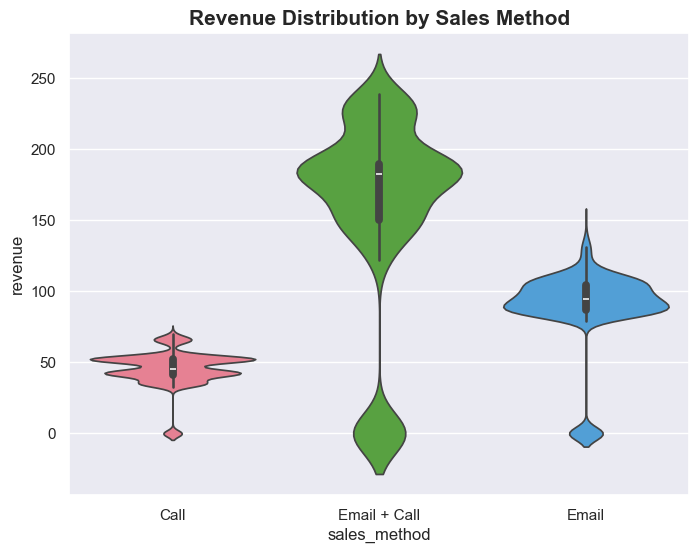

In [88]:
plt.figure(figsize=(8,6))
sns.violinplot(x= 'sales_method', y='revenue',  data =df,  palette="husl")
plt.title('Revenue Distribution by Sales Method', fontsize= 15, fontweight= 'bold')
plt.show()

**Observation**

The violin plot shows the distribution of revenue across different sales methods: Call, Email, and Email + Call. The Email + Call method exhibits the highest revenue variability, with a wider spread and higher concentration of larger revenue values, suggesting it is the most effective method for generating high sales. In contrast, the Email method has a more moderate revenue range, with most values clustered around 100, indicating a relatively consistent performance. The Call method, however, shows the lowest revenue distribution, with a narrower range and lower overall values, implying it is the least effective at generating significant revenue. 

Overall, the Email + Call method appears to be the most profitable, while Call alone yields the lowest revenue.

**General Trend of revenue over time**

Text(0.5, 1.0, 'Trend of revenue over the weeks')

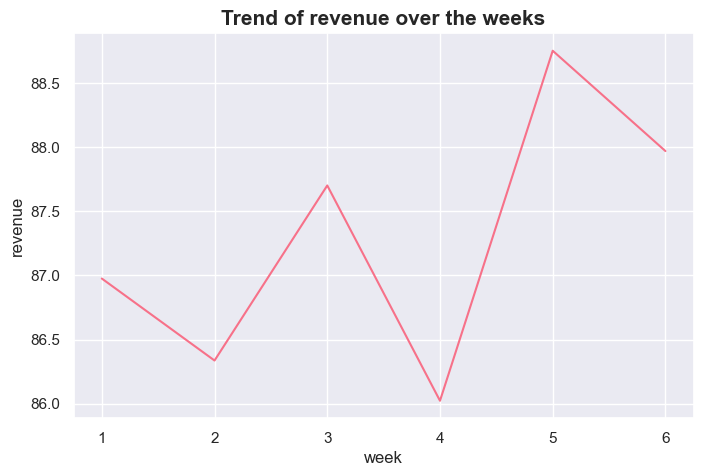

In [96]:
plt.figure(figsize=(8,5))
sns.lineplot(x='week',y='revenue', data=df, errorbar=None)
plt.title('Trend of revenue over the weeks', fontweight= 'bold', fontsize=15)

**Observation**

The line chart illustrates the trend of revenue over six weeks. Initially, revenue starts at approximately 87 and experiences a slight decline in the second week. However, it rises significantly in the third week before dropping to its lowest point in the fourth week, around 86. The most notable change occurs between the fourth and fifth weeks, where revenue surges sharply to its highest point above 88. This increase is followed by a slight decline in the sixth week. 

Overall, the chart indicates fluctuations in revenue, with a significant peak in the fifth week.

**Weekly Revenue by Sales Method**

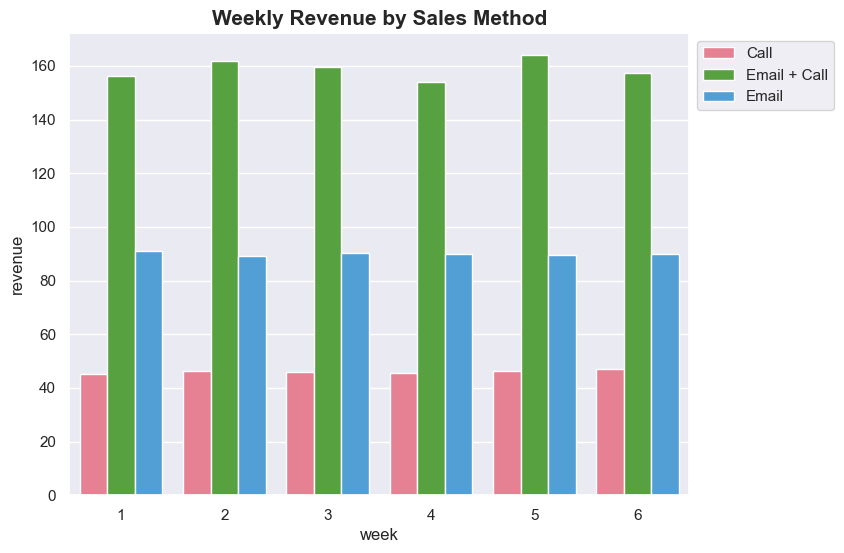

In [97]:
plt.figure(figsize=(8,6))
sns.barplot(x='week', y='revenue', hue='sales_method', data=df, palette='husl', errorbar=None)
plt.title('Weekly Revenue by Sales Method', fontweight= 'bold', fontsize= 15)
plt.legend(bbox_to_anchor=(1,1))

**Observation**

The bar chart displays revenue trends across the six weeks for the three different communication methods. The "Email + Call" method consistently generates the highest revenue, with values exceeding 150 each week. "Email" follows as the second most effective method, maintaining a revenue range around 85–90. "Call" generates the lowest revenue, fluctuating between 40 and 50. 

The pattern suggests that a combined approach of email and call is the most effective in driving revenue, while relying solely on calls results in the lowest returns. The revenue trends appear relatively stable across the six weeks, with only slight variations.

**Trend of revenue for each Sales Method over time**

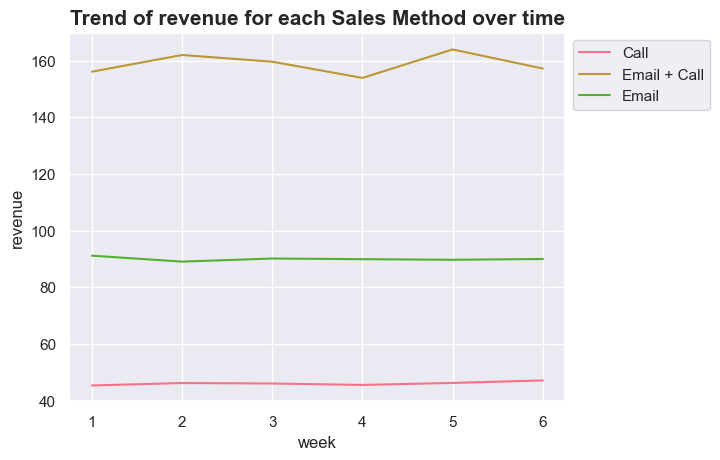

In [77]:
sns.lineplot(x='week', y='revenue',hue='sales_method', data=df, errorbar=None)
plt.title('Trend of revenue for each Sales Method over time', fontweight= 'bold', fontsize=15)
plt.legend(bbox_to_anchor=(1, 1))

**Observation**

The line chart illustrates the revenue trends over six weeks for the three sales methods. The "Email + Call" method consistently generates the highest revenue, fluctuating between approximately 150 and 165, with minor variations. "Email" follows a relatively stable trend, maintaining revenue around 85–90 across the weeks. The "Call" method has the lowest revenue, staying between 45 and 50, with a slight increase towards the end. 

Overall, the "Email + Call" method remains the most effective, while both "Email" and "Call" show minimal changes over time.

**Number of Site Visits per Sales Method**

Text(0.5, 1.0, 'Site Visits Distribution Across Sales Methods')

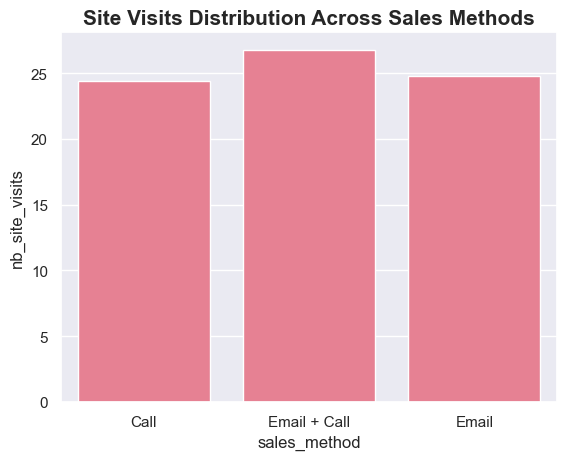

In [100]:
sns.barplot(x='sales_method', y='nb_site_visits', data=df, errorbar=None)
plt.title('Site Visits Distribution Across Sales Methods', fontweight='bold', fontsize=15)

**Observation**

The bar chart presents the number of site visits associated with different sales methods. The "Email + Call" method records the highest number of site visits, slightly exceeding 26. "Email" and "Call" generate a nearly equal number of visits, both around 24–25. 

This suggests that combining email and call interactions leads to slightly more engagement in terms of site visits, while the individual methods of "Call" and "Email" produce similar results.

## Multivariate Analysis

**Relationship Between Site Visits and Revenue Across Sales Methods**

Text(0.5, 1.0, 'Relationship Between Site Visits and Revenue Across Sales Methods')

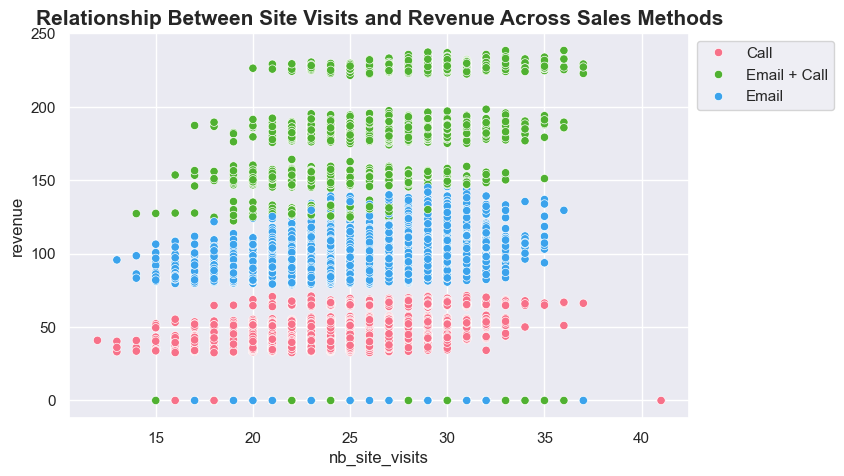

In [110]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='nb_site_visits', y='revenue',hue= 'sales_method', data= df, palette= 'husl')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Relationship Between Site Visits and Revenue Across Sales Methods', fontweight='bold', fontsize= 15)


**Observation**

The scatter plot illustrates the correlation between the number of site visits and revenue for different sales methods. The "Email + Call" method (green) consistently generates the highest revenue, reaching up to 250, with a wide distribution of site visits ranging from approximately 15 to 40. The "Email" method (blue) shows moderate revenue, mostly between 50 and 150, with site visits concentrated between 15 and 35. The "Call" method (red) results in the lowest revenue, primarily under 75, even with a similar distribution of site visits. 

Overall, the trend indicates that the "Email + Call" method is the most effective at driving higher revenue, while "Call" alone remains the least impactful.

<Axes: xlabel='sales_method', ylabel='years_as_customer'>

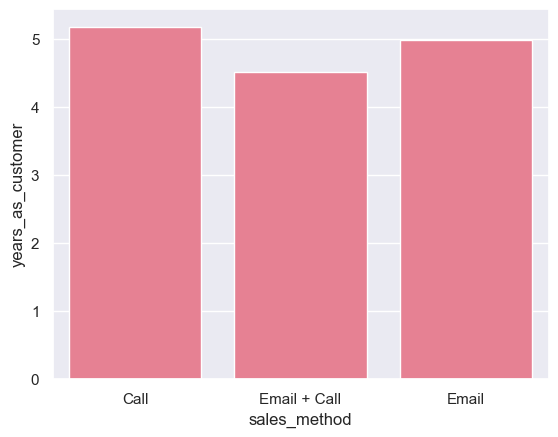

In [113]:
sns.barplot(x='sales_method', y='years_as_customer', data=df, errorbar=None)

**Revenue Trends Based on Customer Tenure Across Sales Methods**

Lets see if a customers tenure or the sales_method used on them affects revenue

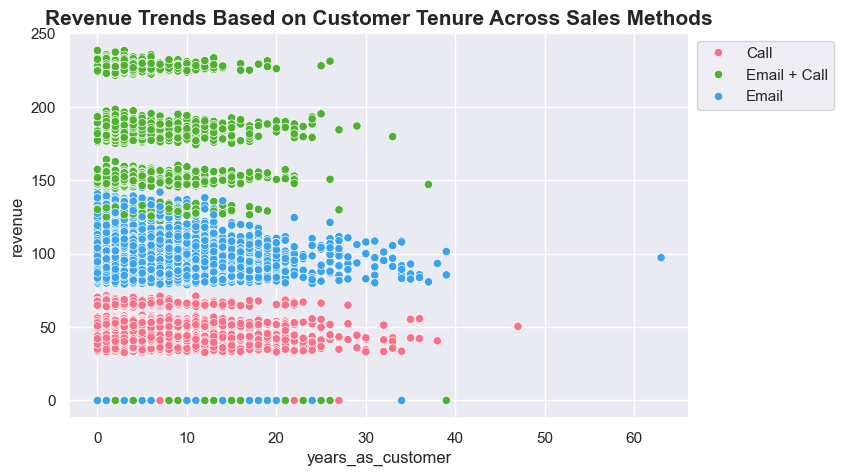

In [118]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='years_as_customer', y='revenue',hue= 'sales_method', data= df, palette= 'husl')
plt.title('Revenue Trends Based on Customer Tenure Across Sales Methods', fontweight='bold', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

**Observation**

The scatter plot visualizes the relationship between years as a customer and revenue across three sales methods. The "Email + Call" method (green) consistently generates the highest revenue, with most values ranging from 150 to 250, regardless of customer tenure. The "Email" method (blue) follows, with revenue primarily between 50 and 150, showing a slight increase for longer-tenured customers. The "Call" method (red) results in the lowest revenue, mostly below 75, with a few outliers among long-term customers. 

While revenue does not strongly correlate with customer tenure, the "Email + Call" method remains the most effective, particularly for maximizing revenue across all customer durations.


**Correlation Analysis Between Key Business Metrics**

Text(0.5, 1.0, 'Correlation Analysis Between Key Business Metrics')

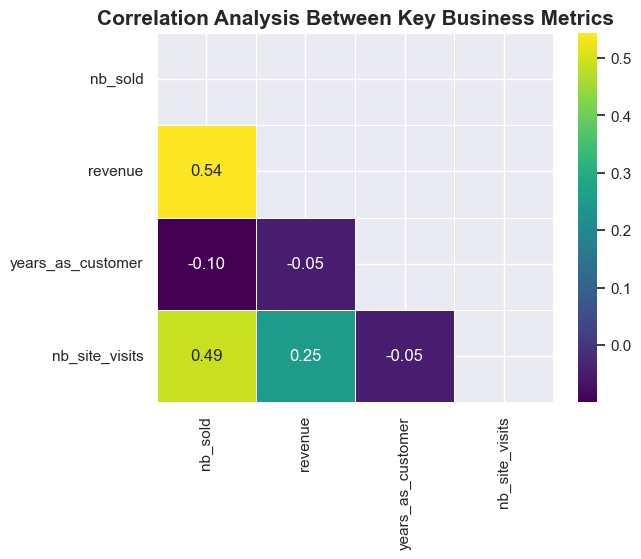

In [120]:
columns= ['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
matrix= df[columns].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True,mask= mask, cmap="viridis", fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Analysis Between Key Business Metrics', fontweight='bold', fontsize=15)



**Observation**

The heatmap displays the correlation between different business metrics.

The strongest positive correlation is between revenue and the number of products sold (0.54), indicating that higher sales contribute significantly to revenue. 

There is also a moderate positive correlation between the number of site visits and both products sold (0.49) and revenue (0.25), suggesting that increased website engagement leads to higher sales and revenue. 

Conversely, customer tenure (years as a customer) shows a weak negative correlation with both products sold (-0.10) and revenue (-0.05) , implying that longer customer relationships do not necessarily translate to higher sales or revenue.

## Conclusion
From the analysis of the dataset, it is evident that the Email + Call sales method is the most effective in generating revenue, consistently outperforming Email-only and Call-only approaches. Revenue trends remain relatively stable over time, with minor fluctuations. Additionally, while the number of site visits positively correlates with revenue and sales, customer tenure does not significantly impact revenue generation. This suggests that engagement through multiple communication channels plays a more crucial role in driving sales than simply maintaining long-term customers.

## Recommendations
- **Prioritize the Email + Call Method:** 
Since this method yields the highest revenue, efforts should be focused on enhancing and optimizing this sales approach. Training sales teams to effectively use both calls and emails in a strategic manner can further boost results.

- **Optimize Call-Only and Email-Only Strategies:**
While Email and Call individually generate revenue, their impact is lower compared to the combined approach. Improving standalone strategies—such as refining email content for better engagement or using data-driven call targeting—could enhance their effectiveness.

- **Increase Customer Engagement Through Site Visits:**
As the number of site visits positively correlates with revenue and sales, businesses should implement strategies to drive more traffic to their website. This could include targeted marketing campaigns, personalized email outreach, and incentives for customers to visit the site.

- **Focus on New and Active Customers Rather Than Long-Term Tenure Alone:**
The weak correlation between customer tenure and revenue suggests that longevity alone does not drive sales. Instead, efforts should be directed toward actively engaging customers regardless of how long they have been associated with the company. This can be done through personalized promotions, loyalty programs, and periodic re-engagement efforts.

- **Leverage Data to Refine Sales Strategies:**
Continuous monitoring of key metrics such as site visits, sales conversions, and revenue patterns should be conducted to refine sales tactics. A/B testing different communication strategies could help identify the most effective engagement methods.

By implementing these recommendations, businesses can optimize their sales processes, enhance customer engagement, and ultimately increase revenue generation.